# 카시트 종합 분석

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

In [2]:
cs =pd.read_csv('https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv')
print(cs.shape)
print()
print(cs.head())

(400, 11)

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [10]:
cs.columns
target = 'Sales'
cs_num = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']
cs_category = ['ShelveLoc', 'Urban', 'US']
cs

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
# 숫자 타입 집계
for i in cs_num:
    print('*' * 10 + f' {i} ' + '*' * 10)
    print(f'median : {cs[i].median()}')
    print(f'mode : {cs[i].mode()}')
    print(cs[i].describe())
    print(f'nan : {cs[i].isna().sum()}')
    print()


********** CompPrice **********
median : 125.0
mode : 0    121
Name: CompPrice, dtype: int64
count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64
nan : 0

********** Income **********
median : 69.0
mode : 0    69
Name: Income, dtype: int64
count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64
nan : 0

********** Advertising **********
median : 5.0
mode : 0    0
Name: Advertising, dtype: int64
count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64
nan : 0

********** Population **********
median : 272.0
mode : 0    125
1    148
2    170
3    220
4    237
5    276
6    497
Name: Pop

In [11]:
# 범주 값 체크
for i in cs_category:
    print(f'{i} : {cs[i].unique()}')

ShelveLoc : ['Bad' 'Good' 'Medium']
Urban : ['Yes' 'No']
US : ['Yes' 'No']


### Sales - [CompPrice, Income, Advertising, Population, Price, Age] ( 숫자 - 숫자 )

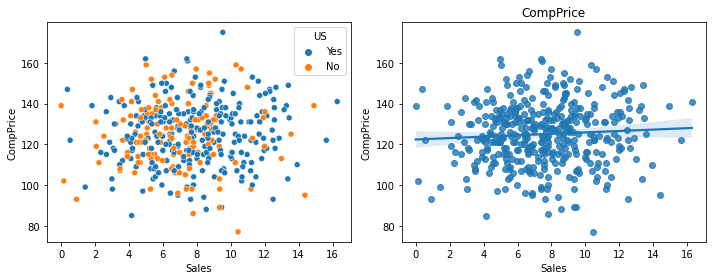

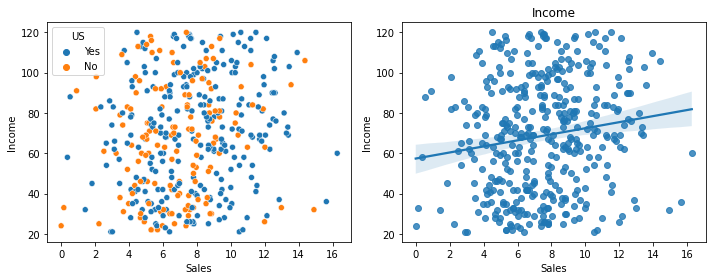

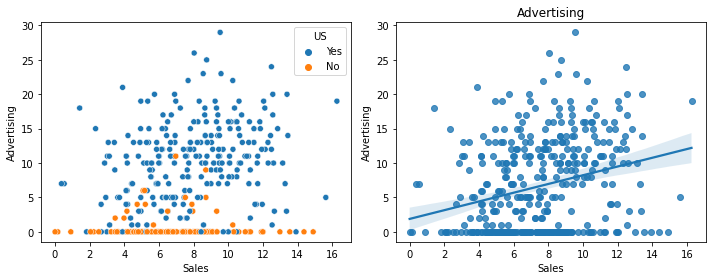

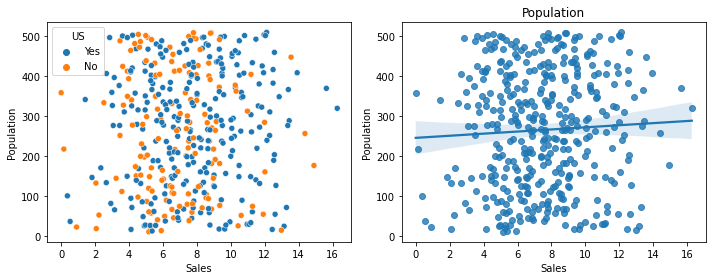

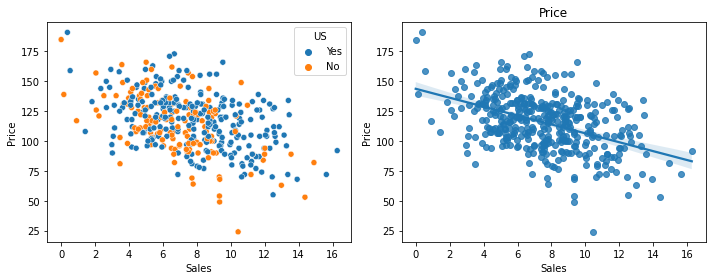

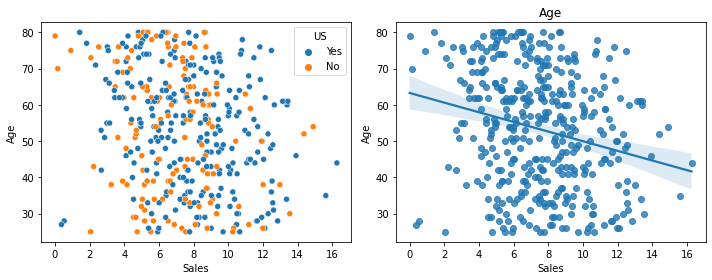

In [23]:
for i in cs_num:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.scatterplot(data=cs, x=target, y=i, hue='US')
    plt.subplot(1,2,2)
    sns.regplot(data=cs, x=target, y=i)
    plt.title(i)
    plt.tight_layout()
    plt.show()
    


In [24]:
# 수치화 ( 상관분석 )
for i in cs_num:
    print(f'{i} : {spst.pearsonr(cs[target], cs[i])}')

CompPrice : (0.06407872955062152, 0.2009398289418295)
Income : (0.15195097946754424, 0.0023096704539517627)
Advertising : (0.269506781376902, 4.377677110302732e-08)
Population : (0.0504709844720392, 0.31398160931903)
Price : (-0.4449507278465726, 7.61818701191294e-21)
Age : (-0.2318154396045765, 2.7889498393711916e-06)


### Sales - [ShelveLoc, Urban, US] ( 숫자 - 범주 )